### MLP with backpropagation learning on XOR problem

- See: 
  - https://web.cs.dal.ca/~tt/fundamentals/programs/Octave/Chapter6/
  - https://marsgr6.github.io/presentations/mlp_in_a_nutshell.slides.html#/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Parameters, neurons: input, hidden, output
N_i = 2; N_h = 4; N_o = 1

# XOR input
r_i = np.matrix('0 1 0 1; 0 0 1 1')

# XOR output
r_d = np.matrix('0 1 1 0')

r_i.T, r_d.T

(matrix([[0, 0],
         [1, 0],
         [0, 1],
         [1, 1]]),
 matrix([[0],
         [1],
         [1],
         [0]]))

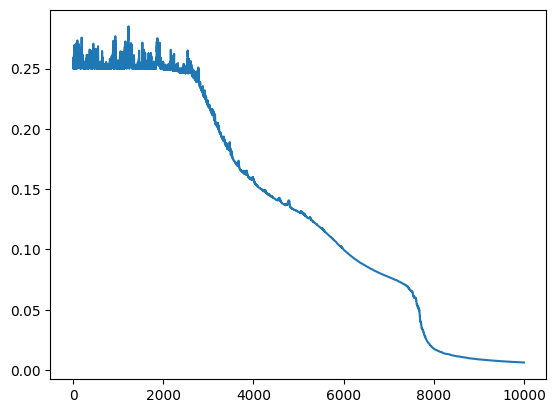

In [ ]:
# Initialize randomly the weights
# Hidden layer
w_h = np.random.rand(N_h,N_i) - 0.5
# Output layer
w_o=np.random.rand(N_o,N_h) - 0.5
training_steps = 10000
mse = []

for i in range(training_steps):
    # Select training pattern randomly (batch learning)
    i = np.floor(4*np.random.rand()).astype('int')
    # Feed-forward the input to hidden layer
    r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))
    # Feed-forward the input to the output layer
    r_o = 1 / (1 + np.exp(-w_o*r_h))
    # Calculate the network error
    d_o = (r_o*(1-r_o)) * (r_d[:,i] - r_o)
    # Calculate the responsability of the hidden network in the error
    d_h = np.multiply(np.multiply(r_h, (1-r_h)), (w_o.T*d_o))
    # Update weights
    w_o = w_o + 0.7*(r_h*d_o.T).T
    w_h = w_h + 0.7*(r_i[:,i]*d_h.T).T
    # Test all patterns
    r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
    mse += [mean_squared_error(r_d, r_o_test)]

plt.plot(mse)

<img src="image-20231025-195026.png" width="" align="" />

In [ ]:
# XOR input
r_i = np.matrix('0 1 0 1; 0 0 1 1')
# THIS IS THE MLP f(X)=y_pred
# Feed-forward input to output layer y = F(X), F(X*W), F:=logistic
r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
r_o_test, r_o_test.round()

(matrix([[0.08270824, 0.9253166 , 0.92860334, 0.08766494]]),
 matrix([[0., 1., 1., 0.]]))

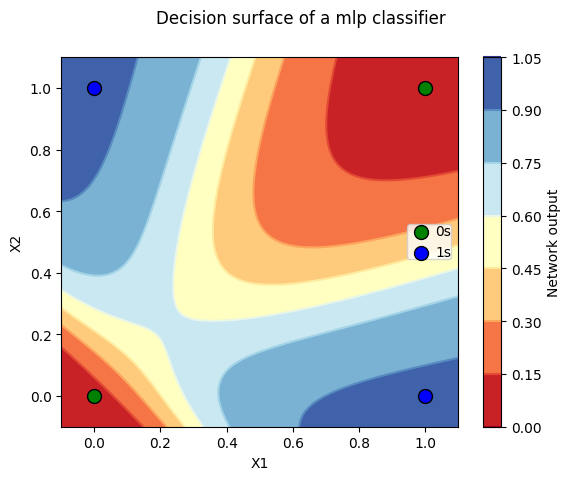

In [ ]:
# Parameters
n_classes = 2
plot_colors = "gb"
plot_markers = "oo"

x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# THIS IS THE MLP f(X)=y_pred=Z
# Feed-forward input to output layer
Z = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*np.c_[xx.ravel(), yy.ravel()].T)))))

Z = Z.reshape(xx.shape)

# Plot contour
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
csl = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Make a colorbar for the cs returned by the contourf call.
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Network output')
# Add the contour line levels to the colorbar
cbar.add_lines(csl)
202410
plt.xlabel("X1")
plt.ylabel("X2")

t_names = ["0s", "1s"]

rd = np.squeeze(np.asarray(r_d))

# Plot the training points
for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
    idx = np.where(rd == i)
    plt.scatter(np.squeeze(np.asarray(r_i.T[list(idx[0]),0])), 
                np.squeeze(np.asarray(r_i.T[list(idx[0]),1])), 
                c=color, label=t_names[i], cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=100, marker=m)

plt.suptitle("Decision surface of a mlp classifier")
plt.legend(loc='center right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

<img src="65a8f5e6-48bc-466e-94fb-8f229b43ca03.jpg" width="" align="" />

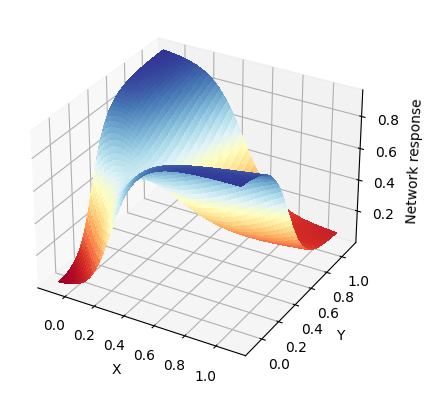

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu,
                       linewidth=0, antialiased=False)

ax.view_init(30, -60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Network response')

plt.show()

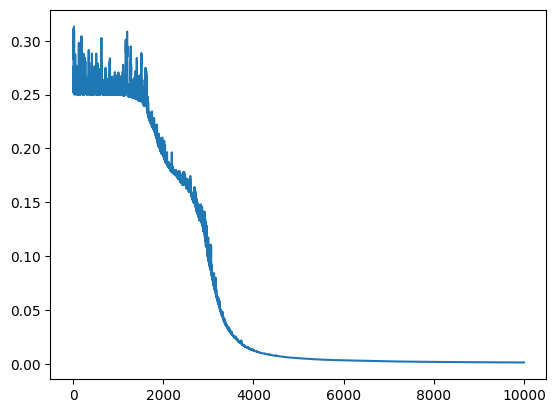

In [ ]:
# Parameters, neurons: input, hidden, output
N_i = 3; N_h = 4; N_o = 2

# XOR input
# r_i = np.matrix('0 1 0 1; 0 0 1 1')
# Last neuron always one is the bias
r_i = np.matrix('0 1 0 1; 0 0 1 1; 1 1 1 1')

# XOR output
# Two classes encoding
r_d = np.matrix('0 1 1 0; 1 0 0 1')

def mlp(r_i, r_d, N_i, N_h, N_o, training_steps=5000, lr=0.7, batch_size=1):

    # Initialize randomly the weights
    # Hidden layer
    w_h = np.random.rand(N_h+1,N_i) - 0.5
    # Output layer
    w_o=np.random.rand(N_o,N_h+1) - 0.5

    mse = []

    for ti in range(training_steps):
        # Select training pattern randomly
        #i = np.floor(4*np.random.rand()).astype('int')
        for bi in range(batch_size):
            # Feed-forward the input to hidden layer
            i = np.floor(np.shape(r_i)[1]*np.random.rand()).astype('int')
            r_h = 1 / (1 + np.exp(-w_h*r_i[:,i]))
            r_h[-1] = 1  # Bias from hidden to output layer
            #r_h = np.concatenate((r_h, np.ones((1,1))), axis=0)
            # Feed-forward the input to the output layer
            r_o = 1 / (1 + np.exp(-w_o*r_h))
            # Calculate the network error
            d_o = np.multiply(np.multiply(r_o, 1-r_o), r_d[:,i] - r_o)
            # Calculate the responsability of the hidden network in the error
            d_h = np.multiply(np.multiply(r_h, (1-r_h)), (w_o.T*d_o))
            # Update weights
            w_o = w_o + lr*(r_h*d_o.T).T
            w_h = w_h + lr*(r_i[:,i]*d_h.T).T
            
        # Test all patterns
        #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
        rht = 1 / (1 + np.exp(-w_h*r_i))
        rht[-1] = 1
        r_o_test = 1 / (1 + np.exp(-w_o*rht))
        mse += [mean_squared_error(r_d, r_o_test)]
        
    return mse, r_o_test, w_h, w_o

result = mlp(r_i, r_d, N_i, N_h, N_o, training_steps=10000, lr=0.7, batch_size=1)
plt.plot(result[0])

In [ ]:
def mlp_predict(r_i, w_h, w_o):
    # Test all patterns
    #r_o_test = 1 / (1 + np.exp(-w_o*(1/(1+np.exp(-w_h*r_i)))))
    rht = 1 / (1 + np.exp(-w_h*r_i))
    rht[-1] = 1  # bias
    r_o_test = 1 / (1 + np.exp(-w_o*rht))
    return r_o_test
    
x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1

gX = np.linspace(x_min, x_max, 100)
gY = np.linspace(y_min, y_max, 100)

gData = np.concatenate((gX.reshape(-1,1), gY.reshape(-1,1)), axis=1)
gData_scaled = gData

# Input, ones is the biased
gData_scaled = np.concatenate((gData_scaled, np.ones((100,1))), axis=1)
r_i = np.matrix(gData_scaled.transpose())

result_test = mlp_predict(r_i, result[2], result[3])

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
                     
Xgd = gData_scaled[:,0]
Ygd = gData_scaled[:,1]

Z = []
for xi in Xgd:
    for yi in Ygd:
        z_result = mlp_predict(np.array([[xi, yi, 1]]).T, result[2], result[3])
        #Z += [np.where(z_result == z_result.max())[0][0]]
        Z += [np.array(z_result[0]).flatten()[0]]

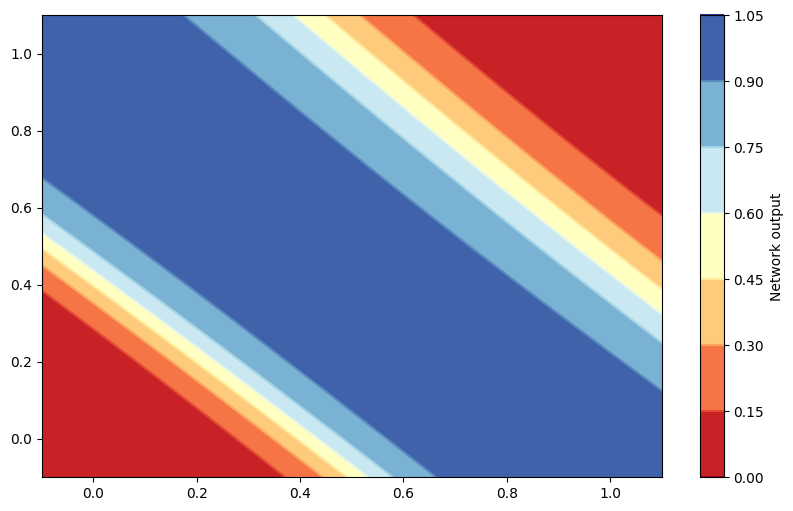

In [ ]:
plt.figure(figsize=(10,6))
Z = np.array(Z)
Z = Z.reshape(xx.shape)

# Plot contour
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
csl = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Make a colorbar for the cs returned by the contourf call.
cbar = plt.colorbar(cs)
cbar.ax.set_ylabel('Network output')
# Add the contour line levels to the colorbar
cbar.add_lines(csl)

In [ ]:
np.array(mlp_predict([[0],[0],[1]], result[2], result[3])[0]).flatten()[0]

0.02243486951030426

In [ ]:
np.array(z_result[0]).flatten()[0]

0.030400932253480346

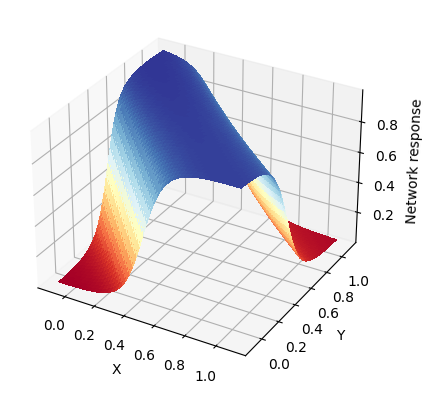

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, Z, cmap=plt.cm.RdYlBu,
                       linewidth=0, antialiased=False)

ax.view_init(30, -60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Network response')

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>